In [5]:
from src.anomaly_toolbox.datasets import MNIST as dataset
import tensorflow as tf
# dataset = dataset()

dataset().configure(
    batch_size=32,
    new_size=(256, 256),
    anomalous_label=1,
    class_label=None,
    shuffle_buffer_size=1000,
    cache=True,
    drop_remainder=True,
    output_range=(-1.0, 1.0)
)

train_dataset = dataset.train
validation_dataset = dataset.validation
test_dataset = dataset.test

# mnist_dataset = dataset()
# train_dataset = mnist_dataset.train
# validation_dataset = mnist_dataset.validation
# test_dataset = mnist_dataset.test

# # Retrieve the shape of the first image in the train dataset
# train_image_shape = next(iter(train_dataset))[0].shape[1:]

# # Retrieve the shape of the first image in the validation dataset
# validation_image_shape = next(iter(validation_dataset))[0].shape[1:]

# # Retrieve the shape of the first image in the test dataset
# test_image_shape = next(iter(test_dataset))[0].shape[1:]

# print(f"Train dataset image size: {train_image_shape}")
# print(f"Validation dataset image size: {validation_image_shape}")
# print(f"Test dataset image size: {test_image_shape}")


In [3]:
from src.anomaly_toolbox.datasets import MNIST as dataset
import tensorflow as tf


dataset().configure(
    batch_size=32,
    new_size=(256, 256),
    anomalous_label=1,
    class_label=None,
    shuffle_buffer_size=1000,
    cache=True,
    drop_remainder=True,
    output_range=(-1.0, 1.0)
)

train_dataset = dataset.train
validation_dataset = dataset.validation
test_dataset = dataset.test

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Determine the image size in the MNIST dataset
image_size = train_images[0].shape

print(f"Train dataset image size: {image_size}")

11490434/11490434 [==============================] - 0s 0us/step
Train dataset image size: (28, 28)


In [8]:
from examples.fqi import FQI as dataset

# dataset = dataset()


dataset().configure(
    batch_size=32,
    new_size=(256, 256),
    anomalous_label=1,
    class_label=None,
    shuffle_buffer_size=1000,
    cache=True,
    drop_remainder=True,
    output_range=(-1.0, 1.0)
)


train_dataset = dataset.train
validation_dataset = dataset.validation
test_dataset = dataset.test

# Print the shape and size of the datasets
print(f"Train dataset: {train_dataset.__sizeof__()}")
print(f"Validation dataset: {validation_dataset.__sizeof__()}")
print(f"Test dataset: {test_dataset.__sizeof__()}")



CWD:  /mnt/c/Users/mcree/Documents/Code/GANs/anomaly-toolbox
Filepath:  fqi/Good/*.fits.gz
Image shape: Tensor("Shape:0", shape=(3,), dtype=int32)
Image shape: Tensor("Shape:0", shape=(3,), dtype=int32)
Train dataset: 64
Validation dataset: 64
Test dataset: 64


In [1]:
from examples.fqi import FQI as dataset
import tensorflow as tf

fqi_dataset = dataset()

fqi_dataset.configure(
    batch_size=32,
    new_size=(256, 256),
    anomalous_label=1,
    class_label=None,
    shuffle_buffer_size=1000,
    cache=True,
    drop_remainder=True,
    output_range=(-1.0, 1.0)
)

train_dataset = fqi_dataset.train
validation_dataset = fqi_dataset.validation
test_dataset = fqi_dataset.test

# Retrieve the shape of the first image in the train dataset
train_image_shape = next(iter(train_dataset))[0].shape[1:]

# Retrieve the shape of the first image in the validation dataset
validation_image_shape = next(iter(validation_dataset))[0].shape[1:]

# Retrieve the shape of the first image in the test dataset
test_image_shape = next(iter(test_dataset))[0].shape[1:]

print(f"Train dataset image size: {train_image_shape}")
print(f"Validation dataset image size: {validation_image_shape}")
print(f"Test dataset image size: {test_image_shape}")

2023-07-13 10:04:00.536725: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 10:04:00.575010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 10:04:01.038115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/mcreelman/miniconda3/envs/GAN/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as noteb

CWD:  /mnt/c/Users/mcree/Documents/Code/GANs/anomaly-toolbox
Filepath:  fqi/Good/*.fits.gz
Image shape: Tensor("Shape:0", shape=(3,), dtype=int32)
Image shape: Tensor("Shape:0", shape=(3,), dtype=int32)


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Tensor("args_0:0", shape=(), dtype=string); No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [7]:
import os
import tensorflow as tf
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt


print(os.getcwd())
path = '/fqi'
normpath = 'fqi/Good/*.fits.gz'
anompath = 'fqi/Bad/*.fits.gz'

import glob
normfiles = glob.glob(normpath)
anomfiles = glob.glob(anompath)

all_data = [normfiles , anomfiles]
i = 0
# create empty dataset
dataset = tf.data.Dataset.from_generator(lambda: (), output_signature=tf.TensorSpec(shape=(), dtype=tf.float32))
for files in all_data:
    data = []
    print(i)

    # pull all the data out of the normfiles
    for file in files:
        data.append(fits.getdata(file))
    
    # convert the list to a tensor
    data = tf.convert_to_tensor(data)

    # label the data as normal (0)
    labels = np.zeros(len(data)) if i == 0 else np.ones(len(data))   
    # convert the labels to a tensor
    labels = tf.convert_to_tensor(labels)

    # add the data and labels to the dataset
    dataset = dataset.concatenate(tf.data.Dataset.from_tensor_slices((data, labels)))



    i = i + 1

print(dataset , dataset.__sizeof__())

# plot a random image from the dataset
plt.imshow(dataset.take(1).__iter__().__next__()[0], cmap='gray')

/mnt/c/Users/mcree/Documents/Code/GANs/anomaly-toolbox
0


TypeError: Incompatible dataset elements:
  TensorSpec(shape=(), dtype=tf.float32, name=None) vs.   (TensorSpec(shape=(215, 215), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))

/mnt/c/Users/mcree/Documents/Code/GANs/anomaly-toolbox
(215, 215) 675
(215, 215) 675


2023-07-13 11:22:09.531869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [675]
	 [[{{node Placeholder/_1}}]]
2023-07-13 11:22:09.532088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [675,215,215]
	 [[{{node Placeholder/_0}}]]
2023-07-13 11:22:09.634804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [6

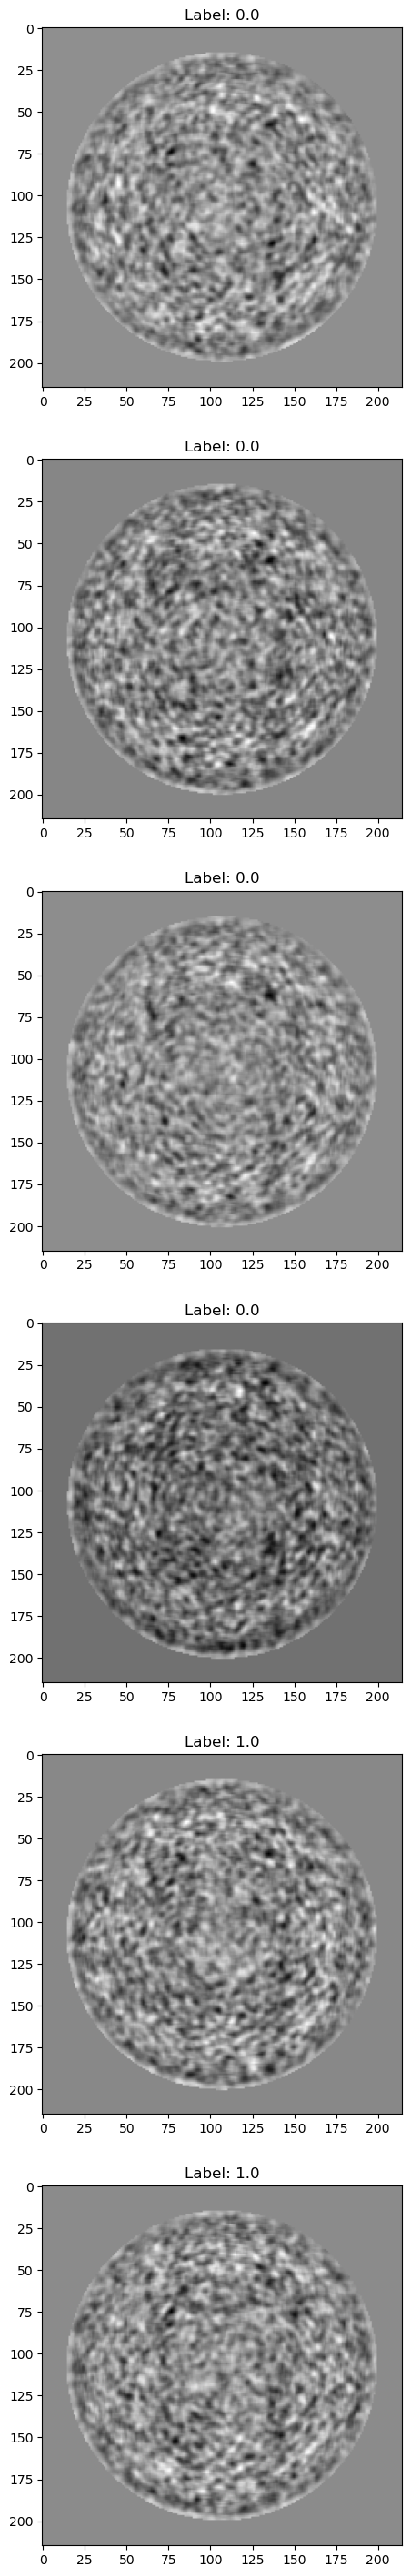

In [19]:
import os
import tensorflow as tf
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

print(os.getcwd())
path = '/fqi'
normpath = 'fqi/Good/*.fits.gz'

import glob
normfiles = glob.glob(normpath)

# pull all the data out of the normfiles
normdata = []
for file in normfiles:
    normdata.append(fits.getdata(file))
# convert the list to a tensor
normdata = tf.convert_to_tensor(normdata, dtype=tf.float32)
# label the data as normal (0)
normlabels = np.zeros(len(normdata))
# convert the labels to a tensor
normlabels = tf.convert_to_tensor(normlabels, dtype=tf.float32)
# create a dataset of the data and labels
normdataset = tf.data.Dataset.from_tensor_slices((normdata, normlabels))

print(normdata[0].shape, len(normdata))

anompath = 'fqi/Bad/*.fits.gz'

anomfiles = glob.glob(anompath)

# pull all the data out of the normfiles
anom_data = []
for file in anomfiles:
    anom_data.append(fits.getdata(file))
# convert the list to a tensor
anom_data = tf.convert_to_tensor(anom_data, dtype=tf.float32)
# label the data as normal (0)
anomlabels = np.ones(len(anom_data))
# convert the labels to a tensor
anomlabels = tf.convert_to_tensor(anomlabels, dtype=tf.float32)
# create a dataset of the data and labels
anomdataset = tf.data.Dataset.from_tensor_slices((anom_data, anomlabels))

print(anom_data[0].shape, len(anom_data))

# combine the normal and anomalous datasets
dataset = normdataset.concatenate(anomdataset)

# plot 3 random images from the dataset stacked vertically
n = 6
fig, axs = plt.subplots(n, 1, figsize=(n*2, n*6))
for i in range(n):
    image, label = dataset.shuffle(1000).take(1).__iter__().__next__()
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"Label: {label.numpy()}")
plt.show()
